<a href="https://colab.research.google.com/github/jhonDataScience/SkillsBills-IBM/blob/main/Prediccion_tarjetas_Modelo%20GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

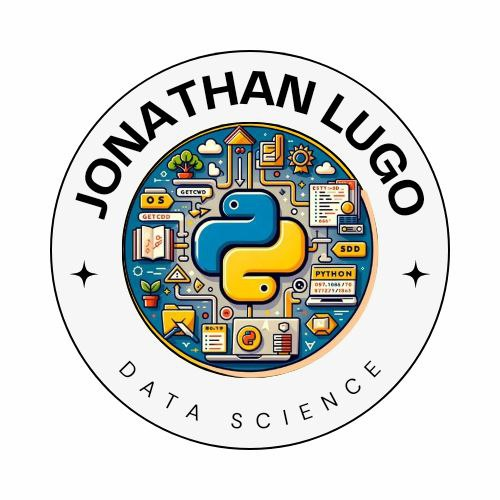

# **Estudio realizado en el marco de la evaluación del Programa de Inteligencia Artificial // SkillUp 2024 IBM ***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
!ls "/content/drive/My Drive/Colab Notebooks"
# Check if the file exists
if os.path.exists('/content/drive/My Drive/Colab Notebooks/creditcard.csv'):
    print("File exists!")
else:
    print("File not found. Please check the file path and ensure the file is present in Google Drive.")

ls: cannot access '/content/drive/My Drive/Colab Notebooks': No such file or directory
File not found. Please check the file path and ensure the file is present in Google Drive.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/My Drive/Colab Notebooks/creditcard.csv'

In [6]:
df = pd.read_csv(file_path)

In [7]:
print("df - Filas:", df.shape[0], "Columnas:", df.shape[1])

df - Filas: 284807 Columnas: 31


In [8]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.duplicated().sum()

1081

<Axes: >

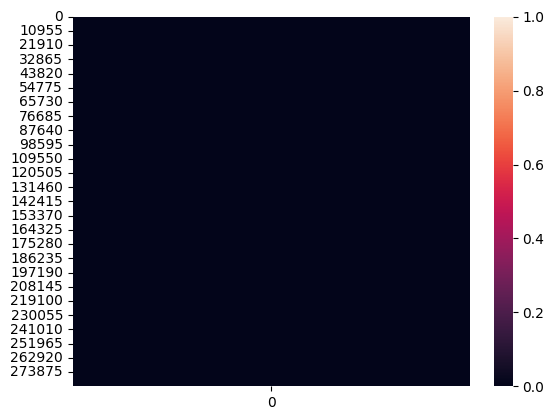

In [11]:
sns.heatmap(df.duplicated().values.reshape(df.shape[0], 1))

# El impacto de los duplicados podria ser muy poco, por eso he tomado la decision de no borrarlos y continuar con ellos, asi se mantendra el patron de esa operacion, pues es posible que sea ella la mas usual de los estafadores.

# ***Desarrollare un modelo de Machine Learning utilizando Gradient Boosting Machine (GBM)***

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [13]:
# Separar las características (features) y la variable objetivo (target)
X = df.drop('Class', axis=1)  # 'Class' es la columna objetivo que indica fraude (1) o no fraude (0)
y = df['Class']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Crear el modelo GBM
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Accuracy: 0.9985838512224524
Confusion Matrix:
[[85305     2]
 [  119    17]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.12      0.22       136

    accuracy                           1.00     85443
   macro avg       0.95      0.56      0.61     85443
weighted avg       1.00      1.00      1.00     85443



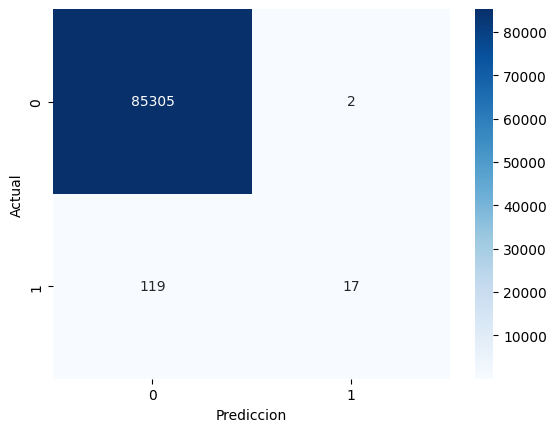

In [15]:
# Hacer predicciones
y_pred = gbm.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Actual')
plt.show()

**Análisis de la Matriz de Confusión**

1.- Verdaderos Negativos (TN): La celda (0,0) tiene el valor 85,305. Esto significa que el modelo predijo correctamente 85,305 transacciones como no fraudulentas.

2.- Falsos Negativos (FN): La celda (1,0) tiene el valor 119. Esto significa que el modelo predijo erróneamente 119 transacciones fraudulentas como no fraudulentas.

3.- Falsos Positivos (FP): La celda (0,1) tiene el valor 2. Esto significa que el modelo predijo erróneamente 2 transacciones no fraudulentas como fraudulentas.

4.- Verdaderos Positivos (TP): La celda (1,1) tiene el valor 17. Esto significa que el modelo predijo correctamente 17 transacciones fraudulentas.

**Conclusiones**

**Exactitud Alta:** El modelo tiene una alta exactitud (99.86%), pero esto puede ser engañoso debido al desequilibrio en las clases (muy pocas transacciones fraudulentas en comparación con las no fraudulentas).

**Bajo Recall:** El recall es bastante bajo (12.5%), lo que indica que el modelo está fallando en detectar una gran cantidad de transacciones fraudulentas. Esto es crítico en la detección de fraudes, ya que queremos minimizar los falsos negativos (fraudes no detectados).

**Desequilibrio de Clases:** El problema principal es el desequilibrio en las clases. El modelo está sobreentrenado para la clase mayoritaria (no fraude) y no está aprendiendo bien a identificar la clase minoritaria (fraude).

In [16]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [5]
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Best parameters found: ", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros
best_gbm = grid_search.best_estimator_
y_pred_best = best_gbm.predict(X_test)
print("Accuracy with best parameters:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix with best parameters:")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report with best parameters:")
print(classification_report(y_test, y_pred_best))

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Accuracy with best parameters: 0.9994148145547324
Confusion Matrix with best parameters:
[[85301     6]
 [   44    92]]
Classification Report with best parameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.68      0.79       136

    accuracy                           1.00     85443
   macro avg       0.97      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



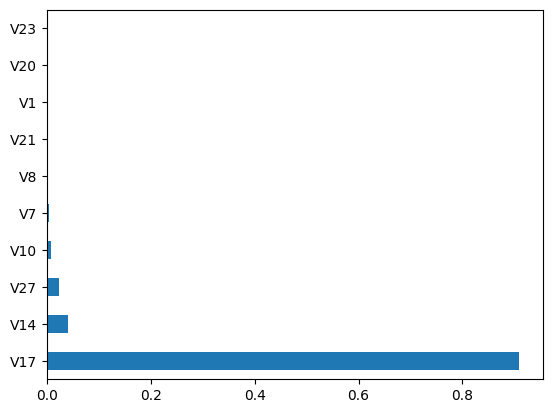

In [17]:
# Mostrar la importancia de las características
feature_importances = pd.Series(gbm.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

**El modelo Gradient Boosting Machine (GBM)**, ajustado con los parámetros óptimos (learning_rate: 0.01, max_depth: 5, n_estimators: 50), alcanzó una precisión de 0.9994. La matriz de confusión muestra que el modelo predijo correctamente 85,301 transacciones no fraudulentas y 92 fraudulentas, con solo 6 falsos positivos y 44 falsos negativos. El reporte de clasificación indica una precisión y una F1-score de 1.00 para la clase no fraudulenta, y una precisión de 0.94 y una F1-score de 0.79 para la clase fraudulenta. Aunque la precisión general es muy alta, la tasa de recall para las transacciones fraudulentas es de 0.68, lo que sugiere que el modelo sigue perdiendo algunos casos de fraude. En general, el modelo muestra un rendimiento excelente, especialmente para la clase mayoritaria, aunque podría beneficiarse de mejoras en la detección de fraudes.

### **Lugo González Jonathan José**
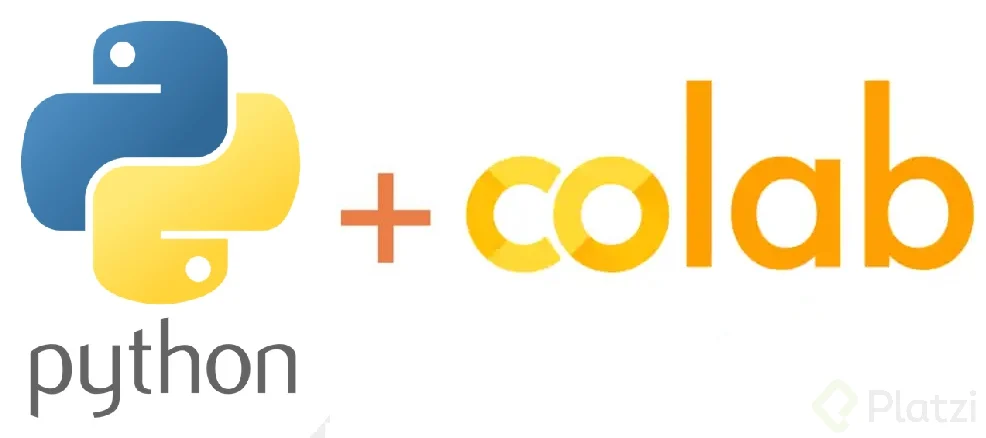